In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/sugat/ProjectCDrive/MLPython/spam_ham_dataset.csv")

In [4]:
print(df)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [5]:
print(df.shape)

(5171, 4)


In [6]:
#1.Data cleaning
#2.EDA
#3.text processing
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy

Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [8]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [9]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
df.drop(columns=["label"],inplace=True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(178)

In [13]:
df=df.drop_duplicates(keep="first")

In [14]:
df.shape

(4993, 2)

EDA

In [15]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
df['text'] = df['text'].str.replace('\r', ' ', regex=False).str.replace('\n', ' ', regex=False)


In [17]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291 th...,0
1,"Subject: hpl nom for january 9 , 2001 ( see a...",0
2,"Subject: neon retreat ho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs this deal is to ...,0


In [18]:
df['label_num'].value_counts()

label_num
0    3531
1    1462
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23506e8e300>,
 [Text(-0.6664987851717366, 0.8750882066195381, 'ham'),
  Text(0.6664990703116317, -0.8750879894466217, 'spam')],
 [Text(-0.36354479191185624, 0.4773208399742935, '70.72'),
  Text(0.36354494744270816, -0.47732072151633903, '29.28')])

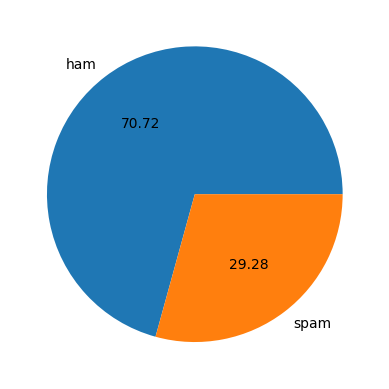

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['label_num'].value_counts(),labels=["ham","spam"],autopct="%0.2f")

In [20]:
#data is imbalanced

In [21]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import nltk

In [23]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sugat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sugat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df["characters"]=df['text'].apply(len)

In [25]:
df.head()

,text,label_num,characters
0,Subject: enron methanol ; meter # : 988291 th...,0,327
1,"Subject: hpl nom for january 9 , 2001 ( see a...",0,97
2,"Subject: neon retreat ho ho ho , we ' re arou...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs this deal is to ...,0,336


In [26]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,text,label_num,characters,num_words
0,Subject: enron methanol ; meter # : 988291 th...,0,327,68
1,"Subject: hpl nom for january 9 , 2001 ( see a...",0,97,24
2,"Subject: neon retreat ho ho ho , we ' re arou...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs this deal is to ...,0,336,71


In [28]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,text,label_num,characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291 th...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001 ( see a...",0,97,24,3
2,"Subject: neon retreat ho ho ho , we ' re arou...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs this deal is to ...,0,336,71,3


In [30]:
df[['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [31]:
df[df['label_num']==0][['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [32]:
df[df['label_num']==1][['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [33]:
df2=df.drop(columns='text')

In [34]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import seaborn as sns

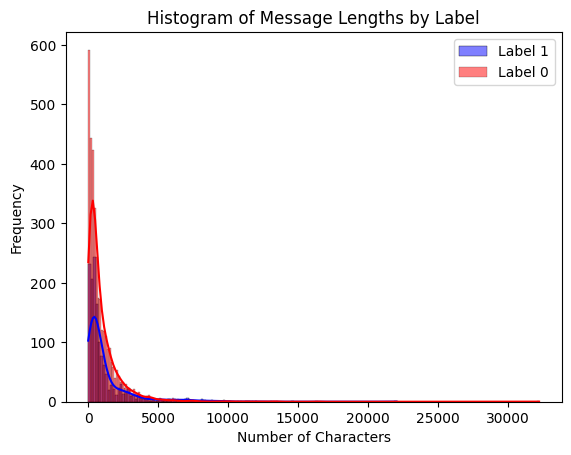

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[df['label_num'] == 1]['characters'], color='blue', label='Label 1', kde=True)
sns.histplot(df[df['label_num'] == 0]['characters'], color='red', label='Label 0', kde=True)

plt.legend()
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.title("Histogram of Message Lengths by Label")
plt.show()


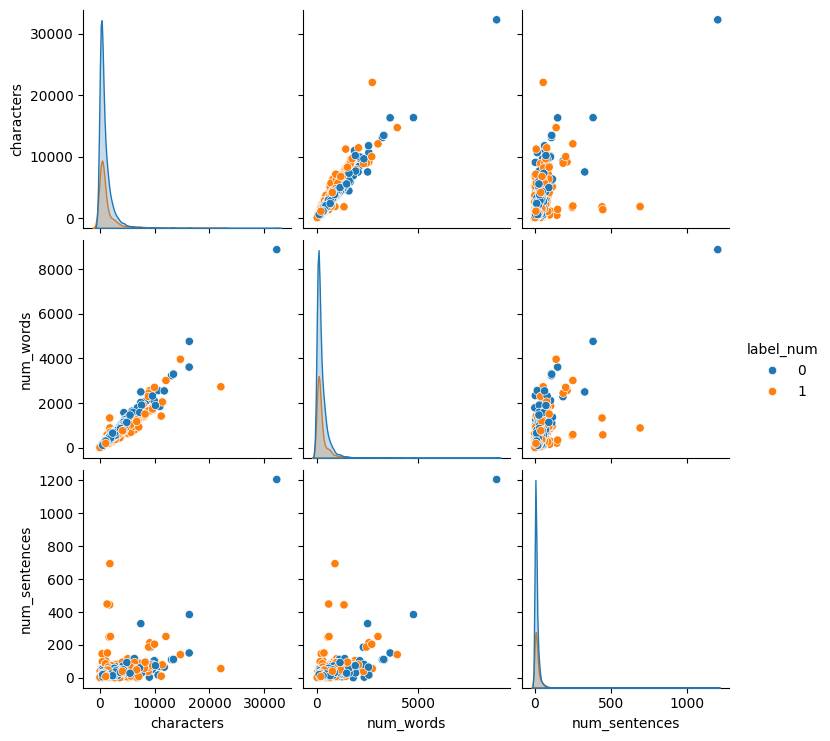

In [37]:
sns.pairplot(df,hue='label_num')

In [38]:
df2.head()

,label_num,characters,num_words,num_sentences
0,0,327,68,3
1,0,97,24,3
2,0,2524,551,24
3,1,414,49,3
4,0,336,71,3


<Axes: >

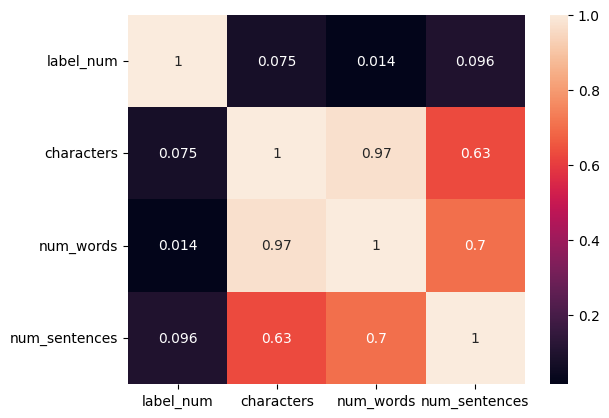

In [39]:
sns.heatmap(df2.corr(),annot=True)

In [40]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    return " ".join(y)

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sugat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords

In [43]:
import string

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [ ]:
spam_wc=wc.generate(df[df['label_num']==1]['transformed_text'].str.cat(sep=' '))

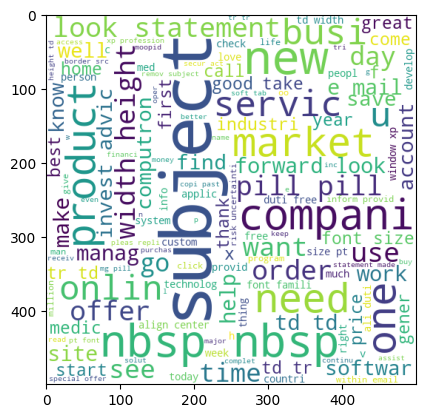

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['label_num']==0]['transformed_text'].str.cat(sep=' '))

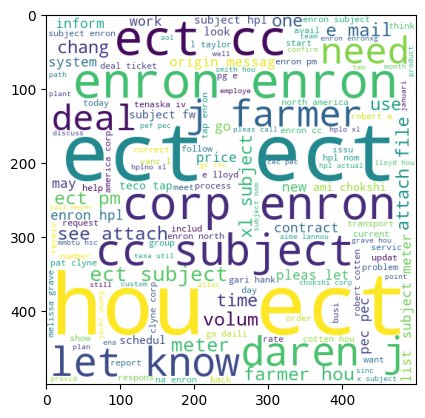

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,text,label_num,characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291 th...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001 ( see a...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat ho ho ho , we ' re arou...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs this deal is to ...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [ ]:
spam_corpus=[]
for msg in df[df['label_num']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

196592

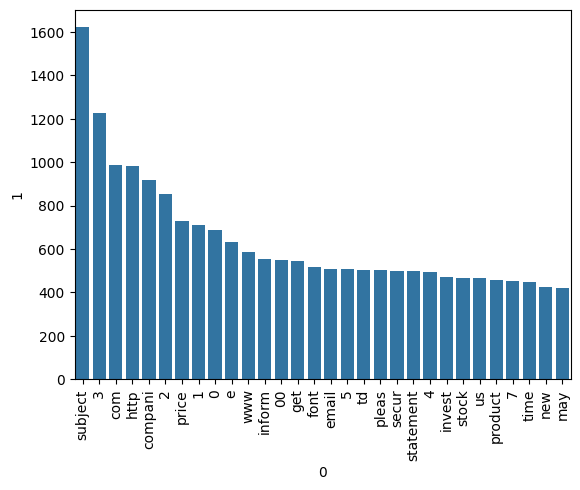

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['label_num']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

380475

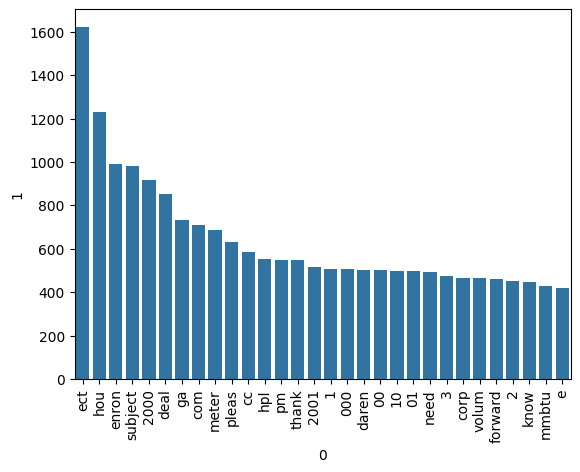

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=TfidfVectorizer()

In [ ]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(4993, 42592)

In [ ]:
y=df['label_num'].values

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
lr=LogisticRegression()

In [ ]:
from tqdm import tqdm

In [ ]:
models={
    "LR":lr
}

predictions={}
for (key,model) in tqdm(models.items()):
    try:
        model.fit(X_train,y_train)
        preds=model.predict(X_test)
        predictions[key]=dict()
        predictions[key]['accuracy']=accuracy_score(y_test,preds)
        predictions[key]['precision']=precision_score(y_test,preds)
    except:
        print(key)

NameError: name 'lr' is not defined

In [ ]:
dict_items=predictions.items()

<class 'dict_items'>


In [ ]:
predictions=dict(sorted(predictions.items(),key=lambda x:x[1].get('precision',0),reverse=True))

In [ ]:
len(predictions)

8

In [ ]:
predictions_df = {
    'Algorithm': [],   # Corrected dictionary key
    'Accuracy': [],    # Make sure you're using the correct key in predictions_df
    'Precision': []    # Use correct key names in predictions_df
}

for key, metrics in predictions.items():
    predictions_df['Algorithm'].append(key)
    predictions_df['Accuracy'].append(metrics.get('accuracy',0))  # Corrected: predictions_df, not predictions
    predictions_df['Precision'].append(metrics.get('precision',0))  # Same here: predictions_df


In [ ]:
algo_df=pd.DataFrame(predictions_df)

In [ ]:
print(algo_df.head())

  Algorithm  Accuracy  Precision
0       mnb  0.904905   0.990196
1        KN  0.964965   0.977941
2       GPC  0.981982   0.954098
3       RFC  0.974975   0.947020
4       ADC  0.955956   0.922559


In [ ]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))